In [61]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [62]:
#usando as unidades de medida do SI
C = 100 * 10**-12
G_L, E_L = 10 * 10**-9, -70 * 10**-3
G_Na, E_Na = 3.6 * 10**-6, 55 * 10**-3
G_K, E_K = 1.6 * 10**-6, -90 * 10**-3
G_T, E_Ca = 0.22 * 10**-6, 120 * 10**-3

In [63]:
def alpham(V):
    if V == (-0.035):
        return 10**3 / np.exp(-100*(V+0.035))
    else:
        return (10**5 * (V+0.035)) / (1 - np.exp(-100*(V+0.035)))
def alphan(V):
    if V == (-0.034):
        return (5 * 10**2) / np.exp(-100*(V+0.034))
    else:
        return (5 * 10**4 * (V+0.034)) / (1 - np.exp(-100*(V+0.034)))

def alphah(V): return 350*np.exp(-50*(V+0.058))

def betam(V): return 4000*np.exp(-(V+0.06)/0.018)
def betan(V): return 625*np.exp(-12.5*(V+0.044))
def betah(V): return 5000 / (1 + np.exp(-100*(V+0.028)))

def m_i(V): return alpham(V) / (alpham(V) + betam(V))
def m_ti(V): return 1 / (1+np.exp(-(V+0.052) / 0.0074))
def h_ti(V): return 1 / (1+np.exp(500*(V+0.076)))

def t_ht(V):
    if V>=(-0.080):
        return 0.028 + 0.001*np.exp(-(V+0.022) / 0.0105)
    else:
        return 0.001*np.exp(15*(V+0.467))

In [64]:
t = np.arange(0, 750, 0.01) #intervalo de tempo

In [65]:
def J_inj(t):
    J_b = 20 * 10**-12
    ti_base = 0
    tf_base = 250
    J_d = 10 * 10**-12
    ti_degrau = 250
    tf_degrau = 500
    return J_b*(t>ti_base)-J_b*(t>tf_base)+J_d*(t>ti_degrau)-J_d*(t>tf_degrau)+J_b*(t>500)


def dALLdt(X,t):
    V, h, n, h_t = X
    dVdt = (J_inj(t) - G_L*(V-E_L) - G_Na * m_i(V)**3 * h*(V-E_Na) - G_K * n**4 * (V-E_K) - G_T * m_ti(V)**2 * h_t*(V-E_Ca)) / C
    dhdt = alphah(V)*(1-h) - betah(V) * h
    dndt = alphan(V)*(1-n) - betan(V) * n
    dh_tdt = (h_ti(V) - h_t) / t_ht(V)

    return dVdt, dhdt, dndt, dh_tdt


v0, h0, n0, h_t0 = -70, 0, 0, 0
X = odeint(dALLdt, [v0, h0, n0, h_t0], t)
V= X[:,0]
h = X[:,1]
n = X[:,2]
h_t = X[:,3]
J_valores = [J_base, J_degrau]

C:\Users\rafae\AppData\Local\Temp\ipykernel_12272\3445130032.py:5: RuntimeWarning: overflow encountered in exp
  return (10**5 * (V+0.035)) / (1 - np.exp(-100*(V+0.035)))
C:\Users\rafae\AppData\Local\Temp\ipykernel_12272\3445130032.py:14: RuntimeWarning: overflow encountered in exp
  def betam(V): return 4000*np.exp(-(V+0.06)/0.018)
C:\Users\rafae\AppData\Local\Temp\ipykernel_12272\3445130032.py:19: RuntimeWarning: overflow encountered in exp
  def m_ti(V): return 1 / (1+np.exp(-(V+0.052) / 0.0074))
C:\Users\rafae\AppData\Local\Temp\ipykernel_12272\3445130032.py:12: RuntimeWarning: overflow encountered in exp
  def alphah(V): return 350*np.exp(-50*(V+0.058))
C:\Users\rafae\AppData\Local\Temp\ipykernel_12272\3445130032.py:16: RuntimeWarning: overflow encountered in exp
  def betah(V): return 5000 / (1 + np.exp(-100*(V+0.028)))
C:\Users\rafae\AppData\Local\Temp\ipykernel_12272\3445130032.py:10: RuntimeWarning: overflow encountered in exp
  return (5 * 10**4 * (V+0.034)) / (1 - np.exp(-10

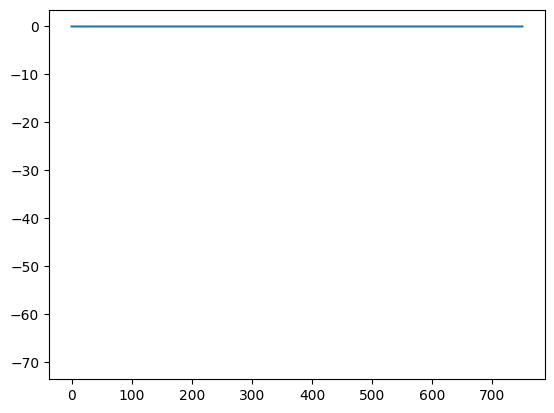

In [66]:
plt.plot(t,V)